### Menghubungkan Collab dengan Google Drive

In [ ]:
# menghubungkan colab dengan google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Pemanggilan Dataset di drive

In [ ]:
# memanggil dataset lewat gdrive
path = "/content/gdrive/My Drive/semester7/MachineLearning/praktikum_ml/praktikum11/"

In [ ]:
import pandas as pd
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

import matplotlib.pyplot as plt
import folium
from folium import plugins

### Mengimport pandas untuk memanggil

In [ ]:
df = pd.read_csv(path + 'data/data_wisata_bogor_lengkap.csv')
df

nama_tempat_wisata kategori               preferensi  \
0        Taman Budaya Sentul City   Budaya  Wisata Budaya & Edukasi   
1       Leuwi Kunten Sentul Bogor     Umum                  Lainnya   
2         ECOART PARK Sentul City     Alam              Wisata Alam   
3     Goa Garunggang - Puncak Dua     Alam              Wisata Alam   
4            Sentul Paradise Park     Alam              Wisata Alam   
...                           ...      ...                      ...   
2088        Tanah Sareal Campsite     Umum                  Lainnya   
2089            Delta 15 Ciliwung     Umum                  Lainnya   
2090                 Delta Biawak     Umum                  Lainnya   
2091                   Taman Oreo     Alam              Wisata Alam   
2092                    Gg. Comel     Umum                  Lainnya   

           kecamatan   kabupaten_kota  rating  jumlah_rating  \
0     Babakan Madang  Kabupaten Bogor     4.5        22727.0   
1     Babakan Madang  Kabupaten Bogor     4.3         1785.0   
2     Babakan Madang  Kabupaten Bogor     4.4        11780.0   
3     Babakan Madang  Kabupaten Bogor     4.6          765.0   
4     Babakan Madang  Kabupaten Bogor     3.4          901.0   
...              ...              ...     ...            ...   
2088     Bogor Utara       Kota Bogor     4.7            7.0   
2089     Bogor Utara       Kota Bogor     4.8           15.0   
2090     Bogor Utara       Kota Bogor     4.3            9.0   
2091    Tanah Sareal       Kota Bogor     4.8           28.0   
2092    Tanah Sareal       Kota Bogor     4.5           39.0   

                                                   link  latitude   longitude  
0     https://www.google.com/maps/place/Taman+Budaya... -6.584002  106.882783  
1     https://www.google.com/maps/place/Leuwi+Kunten... -6.578766  106.918910  
2     https://www.google.com/maps/place/ECOART+PARK+... -6.568722  106.845751  
3     https://www.google.com/maps/place/Goa+Garungga... -6.573150  106.936201  
4     https://www.google.com/maps/place/Sentul+Parad... -6.614256  106.908554  
...                                                 ...       ...         ...  
2088  https://www.google.com/maps/place/Tanah+Sareal... -6.562800  106.798473  
2089  https://www.google.com/maps/place/Delta+15+Cil... -6.550927  106.803954  
2090  https://www.google.com/maps/place/Delta+Biawak... -6.553514  106.805862  
2091  https://www.google.com/maps/place/Taman+Oreo/d... -6.568695  106.802231  
2092  https://www.google.com/maps/place/Gg.+Comel/da... -6.561568  106.777585  

[2093 rows x 10 columns]

In [ ]:
# Melihat struktur data & tipe data setiap kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2093 entries, 0 to 2092
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   nama_tempat_wisata  2093 non-null   object 
 1   kategori            2093 non-null   object 
 2   preferensi          2093 non-null   object 
 3   kecamatan           2093 non-null   object 
 4   kabupaten_kota      2093 non-null   object 
 5   rating              2020 non-null   float64
 6   jumlah_rating       2020 non-null   float64
 7   link                2093 non-null   object 
 8   latitude            2093 non-null   float64
 9   longitude           2093 non-null   float64
dtypes: float64(4), object(6)
memory usage: 163.6+ KB


In [ ]:
# Membersihkan data
df_clean = df.dropna(subset=['latitude', 'longitude']).copy()

df_clean = df_clean[
    (df_clean['latitude'].between(-90, 90)) &
    (df_clean['longitude'].between(-180, 180))
].reset_index(drop=True)

In [ ]:
# Cek kembali setelah dibersihkan
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2093 entries, 0 to 2092
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   nama_tempat_wisata  2093 non-null   object 
 1   kategori            2093 non-null   object 
 2   preferensi          2093 non-null   object 
 3   kecamatan           2093 non-null   object 
 4   kabupaten_kota      2093 non-null   object 
 5   rating              2020 non-null   float64
 6   jumlah_rating       2020 non-null   float64
 7   link                2093 non-null   object 
 8   latitude            2093 non-null   float64
 9   longitude           2093 non-null   float64
dtypes: float64(4), object(6)
memory usage: 163.6+ KB


In [ ]:
# Menyiapkan fitur koordinat (derajat)
coords_deg = df_clean[['latitude', 'longitude']].to_numpy()

# Mengubah derajat ke radian
coords_rad = np.radians(coords_deg)

# Melihat 5 baris pertama sebagai sampel
coords_rad[:5]

array([[-0.11491252,  1.86545647],
       [-0.11482113,  1.86608702],
       [-0.11464583,  1.86481015],
       [-0.11472311,  1.8663888 ],
       [-0.11544055,  1.86590627]])

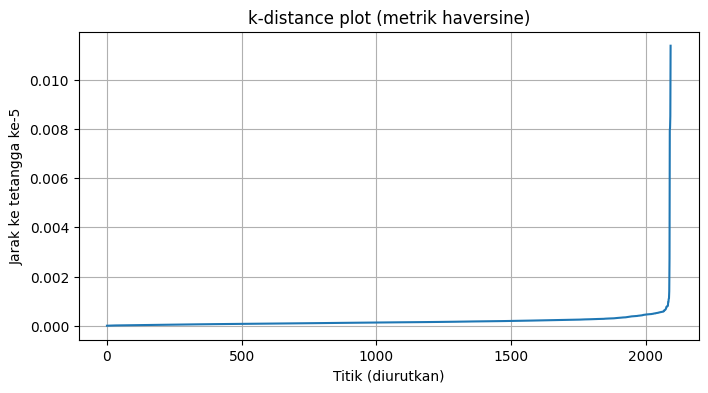

In [ ]:
# Menentukan min_samples (bisa dicoba 4–6)
min_samples = 5

# Melatih Nearest Neighbors dengan metrik haversine
neigh = NearestNeighbors(n_neighbors=min_samples, metric='haversine')
neigh.fit(coords_rad)

# Mengambil jarak tetangga ke-min_samples
distances, indices = neigh.kneighbors(coords_rad)

# Jarak ke tetangga terjauh dari 5 tetangga
k_distances = np.sort(distances[:, -1])

# Plot
plt.figure(figsize=(8,4))
plt.plot(k_distances)
plt.title("k-distance plot (metrik haversine)")
plt.xlabel("Titik (diurutkan)")
plt.ylabel(f"Jarak ke tetangga ke-{min_samples}")
plt.grid(True)
plt.show()

In [ ]:
# Mencoba eps lebih kecil
eps_rad = 0.0012      # sekitar 765 meter
min_samples = 5

dbscan = DBSCAN(
    eps=eps_rad,
    min_samples=min_samples,
    metric='haversine'
)

labels = dbscan.fit_predict(coords_rad)
df_clean['cluster'] = labels

df_clean['cluster'].value_counts()

cluster
 0    2088
-1       5
Name: count, dtype: int64

In [ ]:
# eps sekitar 1100 meter
eps_m = 1100
earth_radius = 6371000
eps_rad = eps_m / earth_radius

min_samples = 5

dbscan = DBSCAN(
    eps=eps_rad,
    min_samples=min_samples,
    metric='haversine'
)

labels = dbscan.fit_predict(coords_rad)
df_clean['cluster'] = labels

df_clean['cluster'].value_counts()

cluster
-1     520
 11    243
 20    212
 7     105
 17     90
      ... 
 58      5
 71      5
 72      5
 32      4
 29      4
Name: count, Length: 74, dtype: int64

In [ ]:
# eps sekitar 1300 meter
eps_m = 1500
earth_radius = 6371000
eps_rad = eps_m / earth_radius

min_samples = 5

dbscan = DBSCAN(
    eps=eps_rad,
    min_samples=min_samples,
    metric='haversine'
)

labels = dbscan.fit_predict(coords_rad)
df_clean['cluster'] = labels

df_clean['cluster'].value_counts()

cluster
 0     1390
-1      250
 6      104
 13      36
 17      22
 30      18
 8       18
 31      17
 20      16
 28      15
 1       14
 9       14
 29      14
 18      13
 2       13
 3       12
 19      10
 11      10
 5       10
 22      10
 26       9
 12       8
 32       7
 10       6
 4        6
 21       6
 7        5
 16       5
 15       5
 14       5
 23       5
 27       5
 25       5
 24       5
 33       5
Name: count, dtype: int64

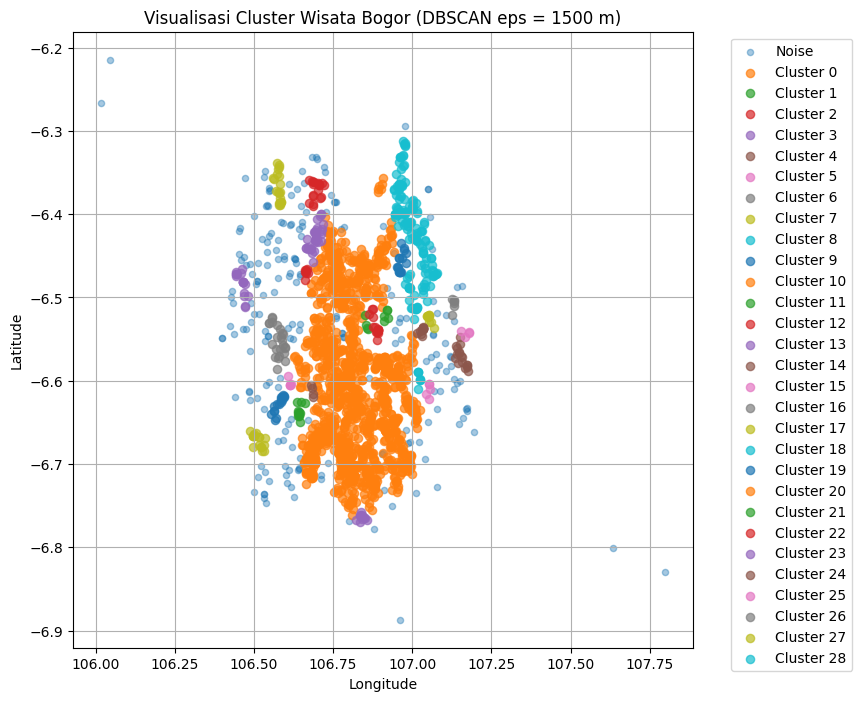

In [ ]:
plt.figure(figsize=(8,8))

unique_labels = sorted(df_clean['cluster'].unique())

for lab in unique_labels:
    mask = df_clean['cluster'] == lab

    if lab == -1:
        color = 'gray'
        label = 'Noise'
        alpha = 0.4
        size = 20
    else:
        color = None   # biarkan matplotlib memilih warna otomatis per cluster
        label = f"Cluster {lab}"
        alpha = 0.7
        size = 35

    plt.scatter(
        df_clean.loc[mask, 'longitude'],
        df_clean.loc[mask, 'latitude'],
        s=size,
        alpha=alpha,
        label=label
    )

plt.title("Visualisasi Cluster Wisata Bogor (DBSCAN eps = 1500 m)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [ ]:
# Membuat pusat peta (rata-rata koordinat)
center_lat = df_clean['latitude'].mean()
center_lon = df_clean['longitude'].mean()

m = folium.Map(location=[center_lat, center_lon], zoom_start=11, tiles='OpenStreetMap')

# Membuat warna per cluster
color_map = {}
unique_labels = sorted(df_clean['cluster'].unique())
colors = [
    'red', 'blue', 'green', 'purple', 'orange', 'darkred', 'lightred',
    'beige', 'darkblue', 'darkgreen', 'cadetblue', 'darkpurple', 'white',
    'pink', 'lightblue', 'lightgreen', 'gray', 'black', 'lightgray'
]

for i, lab in enumerate(unique_labels):
    if lab == -1:
        color_map[lab] = 'lightgray'  # noise
    else:
        color_map[lab] = colors[i % len(colors)]

# Tambahkan marker titik wisata
for _, row in df_clean.iterrows():
    cluster_id = row['cluster']
    color = color_map[cluster_id]

    popup_text = (
        f"<b>{row['nama_tempat_wisata']}</b><br>"
        f"Kategori: {row['kategori']}<br>"
        f"Kecamatan: {row['kecamatan']}<br>"
        f"Rating: {row['rating']} ({row['jumlah_rating']} ulasan)<br>"
        f"Cluster: {cluster_id}<br>"
        f"<a href='{row['link']}' target='_blank'>Buka di Maps</a>"
    )

    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=4,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        popup=folium.Popup(popup_text, max_width=300)
    ).add_to(m)

m

In [ ]:
heat_data = df_clean[['latitude', 'longitude']].to_numpy().tolist()

m_heat = folium.Map(location=[center_lat, center_lon], zoom_start=11, tiles='OpenStreetMap')

plugins.HeatMap(
    heat_data,
    radius=15,
    blur=10,
    max_zoom=13
).add_to(m_heat)

m_heat

In [ ]:
df_clean.groupby('cluster').agg({
    'nama_tempat_wisata': 'count',
    'kecamatan': lambda x: x.mode()[0] if len(x) > 0 else None,
    'rating': 'mean'
}).sort_values('nama_tempat_wisata', ascending=False).head(10)

nama_tempat_wisata       kecamatan    rating
cluster                                              
 0                     1420  Babakan Madang  4.581479
-1                      207         Cigudeg  4.547030
 8                      121       Cileungsi  4.475424
 13                      37         Ciseeng  4.436111
 17                      22  Parung Panjang  4.263636
 18                      21       Cileungsi  4.504762
 22                      19   Gunung Sindur  4.578947
 26                      19     Leuwisadeng  4.643750
 23                      18         Jasinga  4.525000
 9                       18    Cibungbulang  4.387500